# Example of Worst Case Analysis (WCA) in a simple electronic circuit.

The objective in this notebook is to apply three methodologies to determine the minimun and maximun value of output voltage. The proposed methodologies are:

*   **Theoretical Result**: after the analysis of the circuit by the expert, the theoretically expected values ​​are established.
*   **Monte Carlo Simulation**: the problem is resolved using a stochastic approach, simulating the variation of the output variable under assumption of certain probability distribution for the dependent ones.
*   **Mathematical programming**: the problem is formulated as a constrained minimization/maximization problem, which is tackled applyying KKT conditions or the clasical Simplex Method.



In [6]:
# Electronic Circuit

  #  Vi
  #  o-----
  #       |
  #      _|_
  #     |___| R1
  #       |
  #       o-------o Vo
  #       |
  #      _|_
  #     |___| R2
  #       |
  #     __|__


## Theretical Result

In [7]:
# Definition of inputs

R1 = 4 
R2 = 6
dR1 = 1
dR2 = .5

Vi = 5
dVi = 0.25

In [8]:
# Results

Vo_min = (Vi-dVi) * (R2-dR2) / ((R1+dR1) + (R2-dR2))

Vo_max = (Vi+dVi) * (R2+dR2) / ((R1-dR1) + (R2+dR2))

print(f'Vo_min = {Vo_min:.3f}')
print(f'Vo_max = {Vo_max:.3f}')

Vo_min = 2.488
Vo_max = 3.592


## Monte Carlo Simulation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random


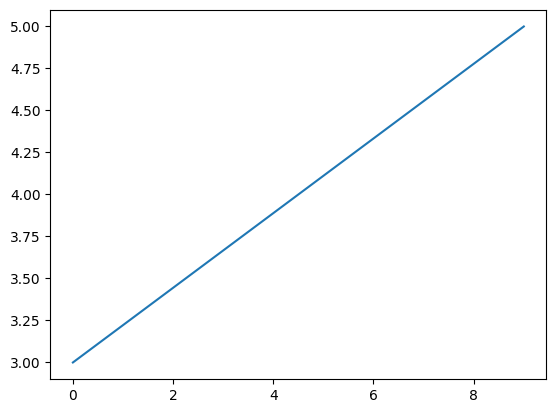

In [10]:
# Definition of inputs

R1 = 4 
R2 = 6
dR1 = 1
dR2 = .5
R_div = 10

Vi = 5
dVi = 0.25
V_div = 10


# Generate list of values (in this case linear/uniform, but we can assume whatever distribution)
R1_vals = np.linspace(R1-dR1, R1+dR1, num=R_div, endpoint=True)
R2_vals = np.linspace(R2-dR2, R2+dR2, num=R_div, endpoint=True)
Vi_vals = np.linspace(Vi-dVi, Vi+dVi, num=V_div, endpoint=True)

plt.plot(R1_vals)


Text(0, 0.5, 'Vo')

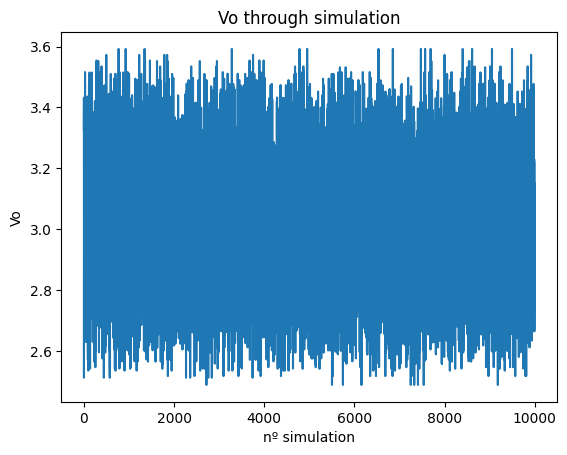

In [11]:
# Simulation

n_simul = 10000 # put the number of simulations

Vo = []
for i in range(1, n_simul):
  Vi = random.choice(Vi_vals)
  R1 = random.choice(R1_vals)
  R2 = random.choice(R2_vals)

  V = Vi * R2 / (R1 + R2)

  Vo.append(V)

plt.plot(Vo)
plt.title("Vo through simulation")
plt.xlabel("nº simulation")
plt.ylabel("Vo")

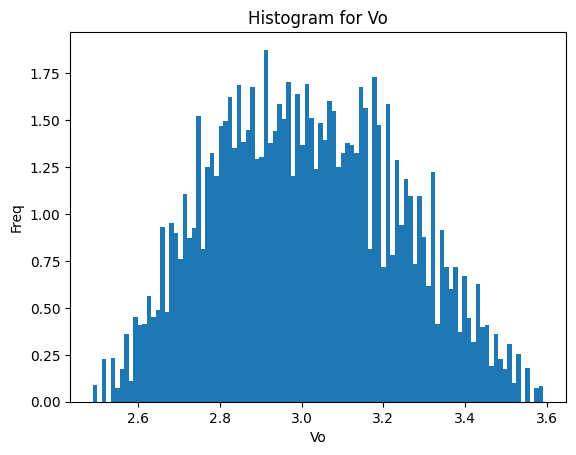

In [ ]:
plt.hist(Vo, bins=100, density=True)
plt.title("Histogram for Vo")
plt.xlabel("Vo")
plt.ylabel("Freq")
plt.show()

In [ ]:
# Which proability distribution fits better for Vo?

import scipy.stats as st
def get_best_distribution(data):
    """
    There is no automatic way of obtaining the distribution type and 
    parameters of a sample (as inferring the distribution of a sample is a 
    statistical problem by itself).
    It is a complete version of the code in the answer above. They created a 
    list of items for all of the possible distributions that could fit the data.
    Then they create a hypothesis using the p-score to determine how close that
    distribution matches the data. What ever has the highest p-score is
    considered the most accurate. That's because the higher p-score means the 
    hypothesis is closest to reality.
    """
    dist_names = ["norm", "truncnorm", "exponweib", "weibull_max", 
                  "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

# Usage
best_dist, best_p, params_best_dist = get_best_distribution(Vo)

p value for norm = 1.28494211733549e-12
p value for truncnorm = 0.0
p value for exponweib = 1.1005189436851367e-05
p value for weibull_max = 2.784129103801697e-08
p value for weibull_min = 1.009255231826793e-06
p value for pareto = 0.0
p value for genextreme = 2.816411359819232e-08
Best fitting distribution: exponweib
Best p value: 1.1005189436851367e-05
Parameters for the best fit: (0.5530134711376258, 3.7223698408098445, 2.4793666100637273, 0.7166818422551902)


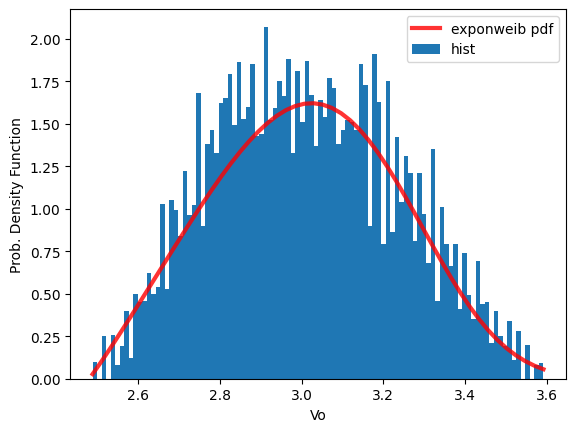

In [ ]:
# Plotting for the best fit: Exponentiated Weibull distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.exponweib.html
from scipy.stats import exponweib

# get params of best prob. fit
a = params_best_dist[0]
c = params_best_dist[1]
loc = params_best_dist[2]
scale = params_best_dist[3]

# Probability density function
x = np.linspace(min(Vo), max(Vo))
pdf = exponweib.pdf(x, a, c, loc, scale)

# Plot
(counts, bins) = np.histogram(Vo, bins=100)
factor = .01 # try

fig, ax = plt.subplots(1, 1)
ax.plot(x, pdf,
       'r-', lw=3, alpha=.8, label='exponweib pdf') # check scale (max diff 1?)
ax.hist(bins[:-1], bins, weights=factor*counts, label="hist")
plt.xlabel("Vo")
plt.ylabel("Prob. Density Function")
plt.legend()
plt.show()

In [ ]:
# Results

Vo_min = min(Vo)
Vo_max = max(Vo)
Vo_mean = np.average(Vo)

print(f'Vo_min = {Vo_min:.3f}')
print(f'Vo_max = {Vo_max:.3f}')
print(f'Vo_mean = {Vo_mean:.3f}')

# Comment: we can see that the minimums and maximums values of Vo, coincide \
#          approximately with the theoretical ones.

Vo_min = 2.488
Vo_max = 3.592
Vo_mean = 3.014


## Mathematical programming

 The problem is formulated as an inequality constrained optimization problem.
 
 min/max $Vo(Vi, R1, R2)$ s.t.

 $V_{i\, min} \le V_i \le V_{i\, max}$, 

 $R_{1\, min} \le R_1 \le R_{1\, max}$, 

 $R_{2\, min} \le R_2 \le R_{2\, max}$

 

In [ ]:
# Definition of inputs

R1 = 4 
R2 = 6
dR1 = 1
dR2 = .5

Vi = 5
dVi = 0.25


### Minimum

In [ ]:
# Minimum

# Refs.:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/optimize.html
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

# The constraints will be taking into account trhough the following "bounds" parameter

import numpy as np
from scipy.optimize import minimize

# The objective function and its derivative are defined as follows.
# Vi = x[0]; R1 = x[1]; R2 = x[2]
def func(x, sign=1.0):
    """ Objective function """
    return sign*(x[0]*x[2]/(x[1]+x[2]))
# The sign parameter is introduced to multiply the objective function 
# (and its derivative) by -1 in order to perform a maximization.

def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(x[2]/(x[1]+x[2]))
    dfdx1 = sign*(-x[0]*x[2]/(x[1]+x[2])**2)
    dfdx2 = sign*(x[0]*x[1]/(x[1]+x[2])**2)
    return np.array([ dfdx0, dfdx1, dfdx2 ])

# Now a constrained optimization can be performed as:
res = minimize(func, [0.0, 0.0, 0.0], args=(1.0), jac=func_deriv,
               bounds = [(Vi-dVi, Vi+dVi), (R1-dR1, R1+dR1), (R2-dR2, R2+dR2)], 
               method='SLSQP', options={'disp': True}) # args refers to sign in func and func_deriv

print('Solution [Vi*, R1*, R2*] =', res.x)

Vo_min = res.fun # here minus sign reverses the artifice of converting a maximization problem

print(f'Vo_min = {Vo_min:.3f}')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.488095238095238
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
Solution [Vi*, R1*, R2*] = [4.75 5.   5.5 ]
Vo_min = 2.488


### Maximum

In [ ]:
# Maximum

# Refs.:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/optimize.html
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

# The constraints will be taking into account trhough the following "bounds" parameter

import numpy as np
from scipy.optimize import minimize

# The objective function and its derivative are defined as follows.
# Vi = x[0]; R1 = x[1]; R2 = x[2]
def func(x, sign=1.0):
    """ Objective function """
    return sign*(x[0]*x[2]/(x[1]+x[2]))
# The sign parameter is introduced to multiply the objective function 
# (and its derivative) by -1 in order to perform a maximization.

def func_deriv(x, sign=1.0):
    """ Derivative of objective function """
    dfdx0 = sign*(x[2]/(x[1]+x[2]))
    dfdx1 = sign*(-x[0]*x[2]/(x[1]+x[2])**2)
    dfdx2 = sign*(x[0]*x[1]/(x[1]+x[2])**2)
    return np.array([ dfdx0, dfdx1, dfdx2 ])

# Now a constrained optimization can be performed as:
res = minimize(func, [0.0, 0.0, 0.0], args=(-1.0), jac=func_deriv,
               bounds = [(Vi-dVi, Vi+dVi), (R1-dR1, R1+dR1), (R2-dR2, R2+dR2)], 
               method='SLSQP', options={'disp': True}) # args refers to sign in func and func_deriv

print('Solution [Vi*, R1*, R2*] =', res.x)

Vo_max = -res.fun # here minus sign reverses the artifice of converting a maximization problem

print(f'Vo_max = {Vo_max:.3f}')

Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.5921052631578947
            Iterations: 4
            Function evaluations: 4
            Gradient evaluations: 4
Solution [Vi*, R1*, R2*] = [5.25 3.   6.5 ]
Vo_max = 3.592


In [ ]:
Vo_min = res.fun
Vo_max = max(Vo)
Vo_mean = np.average(Vo)

print(f'Vo_min = {Vo_min:.3f}')
print(f'Vo_max = {Vo_max:.3f}')
print(f'Vo_mean = {Vo_mean:.3f}')

Vo_min = -3.592
Vo_max = 3.592
Vo_mean = 3.014


### **Conclusion**:

It can be seen that the three methodologies proposed for the resolution of WCA problem are equivalent.
